# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/nhtsa/safety-recalls?resource=download

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# These are just the ones I've used most often.
data = pd.read_csv('fordrecalls.csv')
data.head()

,Record ID,NHTSA Campaign,Manufacturer Campaign,Vehicle Make,Vehicle Model,Model Year,Vehicle Manufacturer,Recall Type,Recall Component,Manufacture Start Date,Manufacture End Date,Estimated Units,Recall Initiative,Recall Manufacturer,Recall Notification Date
0,1,02V288000,02S41,FORD,FOCUS,2001,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
1,2,02V288000,02S41,FORD,FOCUS,2000,FORD MOTOR COMPANY,VEHICLE,ELECTRICAL SYSTEM:BATTERY:CABLES,19990719.0,20010531.0,291854.0,ODI,FORD MOTOR COMPANY,20030210.0
2,3,02V236000,NaN,JAYCO,FT EAGLE 10 SG,2003,"JAYCO, INC.",VEHICLE,EQUIPMENT:OTHER:LABELS,20020730.0,20020813.0,86.0,MFR,"JAYCO, INC.",20020923.0
3,4,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2003,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0
4,5,02V237000,NaN,HOLIDAY RAMBLER,ADMIRAL SE,2002,MONACO COACH CORP.,VEHICLE,STRUCTURE,NaN,NaN,6223.0,MFR,MONACO COACH CORPORATION,20021105.0


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [3]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# I expected some nulls, but not quite that many in the manufaturer campaiagn.

Record ID - 0%
NHTSA Campaign - 0%
Manufacturer Campaign - 66%
Vehicle Make - 0%
Vehicle Model - 0%
Model Year - 0%
Vehicle Manufacturer - 0%
Recall Type - 0%
Recall Component - 0%
Manufacture Start Date - 26%
Manufacture End Date - 26%
Estimated Units - 0%
Recall Initiative - 0%
Recall Manufacturer - 0%
Recall Notification Date - 9%


In [5]:
# data.shape
data.columns
# data.info()
# data.describe()
# Seeing the model year max is 9999 shows some obvious errors so that will have to be cleaned up. 

Index(['Record ID', 'NHTSA Campaign', 'Manufacturer Campaign', 'Vehicle Make',
       'Vehicle Model', 'Model Year', 'Vehicle Manufacturer', 'Recall Type',
       'Recall Component', 'Manufacture Start Date', 'Manufacture End Date',
       'Estimated Units', 'Recall Initiative', 'Recall Manufacturer',
       'Recall Notification Date'],
      dtype='object')

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

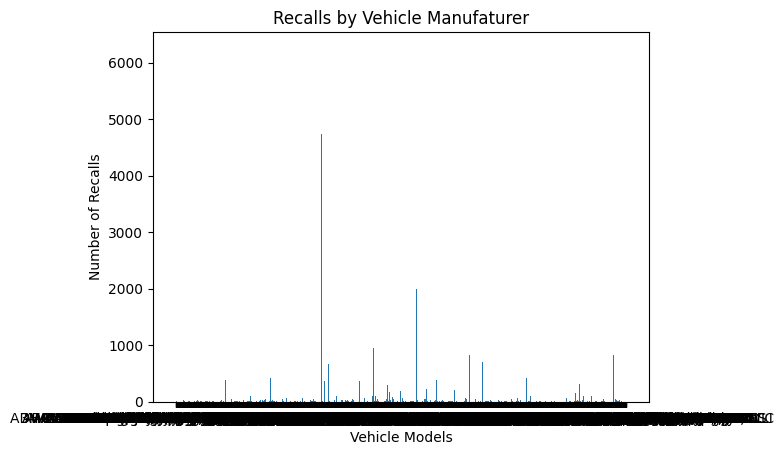

In [6]:
recalls_by_model = data.groupby('Vehicle Manufacturer')['Record ID'].count()

models = recalls_by_model.index
recall_count = recalls_by_model.values

plt.bar(models,recall_count)
plt.title('Recalls by Vehicle Manufaturer')
plt.xlabel('Vehicle Models')
plt.ylabel('Number of Recalls')
plt.show()

#This doesnt give any obvious details BUT it shows me some manufacturer has drastically more recalls. 

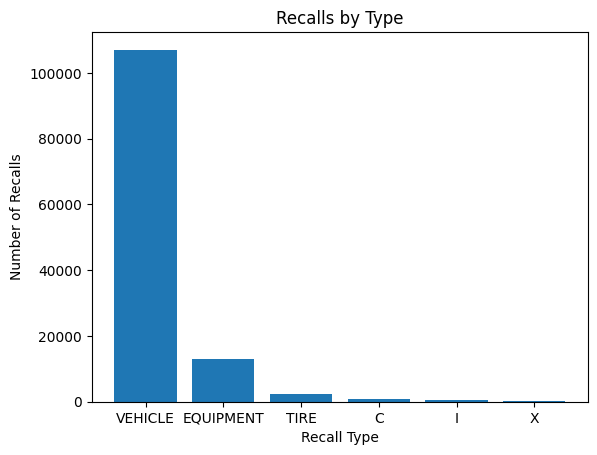

In [16]:
recall_type_counts = data['Recall Type'].value_counts()

recall_type = recall_type_counts.index
recall_counts = recall_type_counts.values

plt.bar(recall_type,recall_counts)
plt.title('Recalls by Type')
plt.xlabel('Recall Type')
plt.ylabel('Number of Recalls')
plt.show()


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? The manufacturer campaign column seems fairly slim.
2. Do you have any concerns about your dataset? I dont know what some of the recall types me (C,I,X) and they dont seem to be defined on kaggle so ill have to google that.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? I'll have to replace the nulls in the manufacturer campaign column if that even relevant and the vehicle's model years will need to be cleaned to eliminate some of the unrealistic years. 